In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

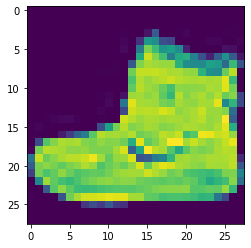

In [ ]:
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
zeros_data = X_train[Y_train == 0]

In [ ]:
zeros_data.shape

(6000, 28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

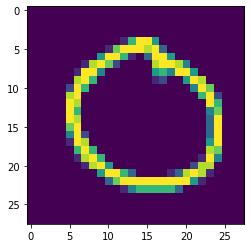

In [44]:
plt.imshow(only_zeros[7])

In [ ]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentrophy', optimizer='adam')

In [ ]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [ ]:
GAN = Sequential([generator, discriminator])

In [ ]:
discriminator.trainable = False

In [ ]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
batch_size = 32

In [47]:
zeros_copy = zeros_data

In [48]:
dataset = tf.data.Dataset.from_tensor_slices(zeros_copy).shuffle(buffer_size=1000)

In [49]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [50]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [51]:
epochs = 1

In [52]:
GAN.layers[0].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_17 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_2 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [53]:
GAN.layers[1].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________
